## A3 Machine Learning
Done By:
- Nikhil Tyagi (B00809791)
- Aniruddha Chitley (B00808320)
- Nitish Bhardwaj (B00811535)

In [2]:
# Imports
import matplotlib.pyplot as plt
import random, pdb
import numpy as np
import tensorflow as tf
import time
import pandas as pd

#svm imports
from sklearn import svm
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline

#Neural net import
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split, GridSearchCV

#Linear classifier
from sklearn.linear_model import LogisticRegression

# Random forest classifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.datasets.samples_generator import make_moons
from mpl_toolkits.mplot3d import axes3d, Axes3D

# SYNTHETIC DATA CREATED USING MOONS

(10000, 2)


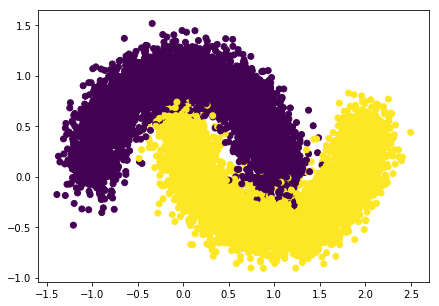

In [3]:
# Synthetic data using MOONS 
X, y = make_moons(n_samples=10000, shuffle=True, noise=0.15, random_state=1)
fig = plt.figure(figsize=(7, 5))
ax = fig.add_subplot(111)
ax.scatter(X[:,0], X[:,1], c=y)
print(X.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Neural Net algorithm using MLP Classifier

In [4]:
#Single Neural Net setting
neural_net = MLPClassifier(activation="logistic", solver="sgd", hidden_layer_sizes=(3,), random_state=1)
neural_net.fit(X_train, y_train)
neural_net.score(X_test,y_test)

c:\users\nikhi\appdata\local\conda\conda\envs\ml-class\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


0.8526666666666667

In [4]:
## Learning rate, hidden layers & their sizes, activation function
parameters = {
    'activation': ['logistic'],
    'solver': ['sgd'],
    'max_iter': [100],
    'learning_rate_init': [0.001, 0.01, 0.1, 1],
    'hidden_layer_sizes': np.arange(2,10)
}
grid_nn = GridSearchCV(MLPClassifier(), parameters, n_jobs=-1, cv=5, return_train_score=True) # using all processors n_jobs=-1 (multicores)
grid_nn.fit(X_train, y_train)
print(grid_nn.score(X_test, y_test))
print(grid_nn.best_params_)

0.987
{'activation': 'logistic', 'hidden_layer_sizes': 3, 'learning_rate_init': 1, 'max_iter': 100, 'solver': 'sgd'}


In [7]:
df = pd.DataFrame(grid_nn.cv_results_)
df[['param_learning_rate_init','param_hidden_layer_sizes', 'mean_fit_time', 'mean_test_score']]

,param_learning_rate_init,param_hidden_layer_sizes,mean_fit_time,mean_test_score
0,0.001,2,1.309821,0.793857
1,0.01,2,1.174380,0.876571
2,0.1,2,1.208159,0.876000
3,1,2,0.882585,0.883429
4,0.001,3,1.228518,0.801429
5,0.01,3,1.220615,0.876000
6,0.1,3,0.947810,0.875429
7,1,3,0.645388,0.988143
8,0.001,4,1.310800,0.808571
9,0.01,4,1.159090,0.876143


#  SVM algorithm using SVC Classifier

In [5]:
# Grid search for SVC on Moon data
parameters = {
    'kernel': ['rbf', 'sigmoid'],
    'C':[ 0.1, 100],
    'gamma':[10,1,0.1,0.01]
}
grid = GridSearchCV(svm.SVC(), param_grid=parameters, cv=2, n_jobs=-1, return_train_score=True)

grid.fit(X_train, y_train)
print(grid.score(X_test, y_test))
print(grid.best_params_)

0.9876666666666667
{'C': 100, 'gamma': 1, 'kernel': 'rbf'}


In [6]:
df = pd.DataFrame(grid.cv_results_)
df[['param_gamma','param_C', 'param_kernel', 'mean_fit_time', 'mean_test_score']]

,param_gamma,param_C,param_kernel,mean_fit_time,mean_test_score
0,10,0.1,rbf,0.062332,0.989857
1,10,0.1,sigmoid,0.604384,0.577143
2,1,0.1,rbf,0.065325,0.986714
3,1,0.1,sigmoid,0.230882,0.636143
4,0.1,0.1,rbf,0.182013,0.874143
5,0.1,0.1,sigmoid,0.214427,0.859571
6,0.01,0.1,rbf,0.286733,0.838571
7,0.01,0.1,sigmoid,0.341087,0.821429
8,10,100,rbf,0.057845,0.989286
9,10,100,sigmoid,0.507144,0.561286


# Random Forest algorithm using Random Forest Classifier

In [7]:
# Random Forests, grid search to find best parameter and run cross validation
parameters = {
    'n_estimators': [60,80,100],
    'max_depth': [int(x) for x in np.linspace(10, 110, num = 11)]
}
grid_rfc = GridSearchCV(RandomForestClassifier(), param_grid=parameters, cv=2, n_jobs=-1, return_train_score=True)
grid_rfc.fit(X_train, y_train)
print(grid_rfc.score(X_test, y_test))
print(grid_rfc.best_params_)

0.9843333333333333
{'max_depth': 10, 'n_estimators': 60}


In [8]:
df = pd.DataFrame(grid_rfc.cv_results_)
df[['param_n_estimators','param_max_depth', 'mean_fit_time', 'mean_test_score']]

,param_n_estimators,param_max_depth,mean_fit_time,mean_test_score
0,60,10,0.186997,0.990143
1,80,10,0.237361,0.989000
2,100,10,0.307177,0.989857
3,60,20,0.174033,0.989143
4,80,20,0.244346,0.989143
5,100,20,0.297704,0.988857
6,60,30,0.174034,0.989286
7,80,30,0.240856,0.989571
8,100,30,0.307678,0.989571
9,60,40,0.183514,0.989000


# Logistic Regression algorithm using Logistic Regression Classifier

In [9]:
# Linear Classifier
parameters = {
    'solver': ['sag', 'lbfgs'],
    'multi_class': ['ovr']
}
grid_lr = GridSearchCV(LogisticRegression(), param_grid=parameters, cv=2, n_jobs=-1, return_train_score=True)

lc = LogisticRegression(solver='sag', multi_class='ovr')

grid_lr.fit(X_train, y_train)
print(grid_lr.score(X_test, y_test))
print(grid_lr.best_params_)

0.872
{'multi_class': 'ovr', 'solver': 'sag'}


In [10]:
df = pd.DataFrame(grid_lr.cv_results_)
df[['param_solver','param_multi_class', 'mean_fit_time', 'mean_test_score']]

,param_solver,param_multi_class,mean_fit_time,mean_test_score
0,sag,ovr,0.021442,0.876286
1,lbfgs,ovr,0.004487,0.876286


<b>Q:</b> Which method works significantly better than others? <br>
<b>A:</b> All the classifiers work quite well on moons data set except for Liner regression.
- Neural Nets: 98.7%
- Support Vector Machine: 98.7%
- Random Forest: 98.4%
- Linear Regression: 87.33%
<br><br>

<b>Q:</b> What decision boundaries that your data set requires? How does this relate to the various models’ performance?<br>
<b>A:</b> Decision boundary for blobs should be atleast one hyperplane seperating each class/centers. So for five centers their can be five or more hyperplanes required to seperate the dataset.<br>

<b>Support Vector Classifier</b>:
- Best config is: {'C': 100, 'gamma': 1, 'kernel': 'rbf'}


<b>Random Forest Classifier</b>:
- Best config is: {'max_depth': 10, 'n_estimators': 60}
- Max depth is 

<b>Linear Classifier</b>:
- Best config is: {'multi_class': 'ovr', 'solver': 'sag'}
- learning1

<b>Neural Network</b>:
- Best config is: {'activation': 'logistic', 'hidden_layer_sizes': 3, 'learning_rate_init': 1, 'max_iter': 100, 'solver': 'sgd'}
- In neural networks, the hidden layer size as 3 works best as 3 hyperplanes can better classify the Moon dataset.
<br><br>
<br><br>